In [86]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [87]:
# tf.debugging.set_log_device_placement(True)

In [88]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
import numpy as np

In [89]:
sess = tf.compat.v1.Session()

In [90]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

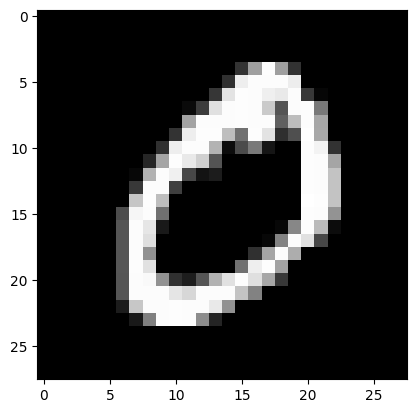

In [91]:
plt.imshow(x_train[1], cmap="gray")
plt.show()

In [93]:
img = Input(shape=(28, 28, 1))

In [94]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [95]:
model = Model(inputs=img, outputs=decoder)
model.compile("nadam", loss="binary_crossentropy")

In [96]:
model.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test, x_test), callbacks=[TensorBoard(log_dir='../logs/conv_autoencoder_logs')])

Epoch 1/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1579 - val_loss: 0.1251
Epoch 2/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1179 - val_loss: 0.1118
Epoch 3/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1095 - val_loss: 0.1050
Epoch 4/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1051 - val_loss: 0.1023
Epoch 5/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1021 - val_loss: 0.0995
Epoch 6/50
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 7/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0984 - val_loss: 0.0964
Epoch 8/50
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0971 - val_loss: 0.0954
Epoch 9/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0960 - val_loss: 0.0942
Epoch 10/50
1875/1875 [==============================] - 31s 17m

In [ ]:
encoder.save('../models/conv_autoencoders/encoder_model')
model.save('../models/conv_autoencoders/conv_model')

1/1 [==============================] - 0s 26ms/step


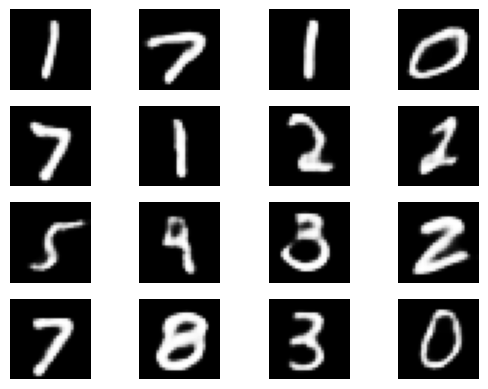

In [97]:
fig, axs = plt.subplots(4, 4)
rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i, j])[0], cmap="gray")
        axs[i, j].axis("off")